## MSDS 7331: Data Mining

## Lab 3: Clustering

## 11 August 2019

## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

# Business Understanding

<div class="alert alert-block alert-info">
<b>Rubric 1:</b> Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
</div>

**Purpose of data set:**
The Census Bureau presents census data from the entire United States including Puerto Rico and District of Columbia. The data consists of 5 year estimates from the 2017 American Community Survey. The data set contains 37 variables that measure features such as socio-economic status, race, and sex, and is produced for all counties. The data for the census was collected to have information on population distributions for the United States. 

**Algorithm effectiveness:**
Our intentions for the data set are to be able to accurately predict unemployment rates and child poverty rates. If we can predict them, then we can see what variables contribute to an accurate prediction. Knowing what factors are associated with unemployment and child poverty can create a basis for what things can be changed to lower unemployment and child poverty. A good prediction algorithm will have a prediction accuracy of at least 80%. Because the data covers the whole United States, it is important to make accurate predictions so that those trying to bring about change can effectively and efficiently utilize resources in places where they are most needed.

**Validation method and metrics:**
To test and validate our models, we will use a stratified shuffle split to divide our data into training and testing sets. Stratification is appropriate for our dataset as a precautionary measure. Our target binary class variables of unemployment and child poverty are already split close to 50/50, but using stratification ensures that this ratio is maintained and not skewed by random chance. In addition, we will use a 80/20 train/test split because we have a fairly large amount of data (70k+ observations). For large datasets, is it appropriate to use a smaller percentage for the test set because there is still plenty to test on, whereas a smaller dataset might necessitate a 60/40 or even a 50/50 train/test split.

The primary evaluation metric we will use for our classification tasks is accuracy, but we will examine precision and recall as well. Accuracy is already a good metric for our dataset, because there is no class imbalance. We will define our target class variables to be split such that half of the observations are considered to have high unemployment and half have low unemployment, and we will make a similar split for child poverty. Thus if we see accuracies much higher than 50%, this is a good indication that the models are performing well.

Precision and recall are also helpful to us based on the people who might be using these models. If a model attains high precision, i.e. there are few false positives, this means that the model did not flag many census tracts that actually had low unemployment or child poverty as ones needing aid. High precision would be good for an organization that has limited resources, i.e. they can only help so many neighborhoods, so they want to make sure the ones they target are actually in need of economic development or aid.

On the other hand, if a model has high recall, i.e. there are few false negatives, this means that when census tracts have high unemployment or child poverty the model correctly identifies them. This would be appropriate for an organization that has extensive resources that wants to aid in all areas that need it, or at least identify/flag all of those areas for future development. Therefore we will look at accuracy, precision and recall for our classification tasks.

# Data Understanding 1

<div class="alert alert-block alert-info">
<b>Rubric 2:</b> Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?
</div>

### Data Meaning and Type

We selected the 2017 Census data taken from the American Community Survey, located on [Kaggle](https://www.kaggle.com/muonneutrino/us-census-demographic-data). It has data from the entire U.S. and can be used for analysis and providing interesting insights. Full sets of data are found on the American fact finder website. We will be using the file named acs2017_census_data.csv for our analysis. The data has 37 variables and 74,001 rows. We will be utilizing all of the data for our analysis. We will be using important attributes that can be used to predict unemployment and child poverty. The attribute definitions are as follows:

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract <br/> (A tract is a geographic area, comparable to a neighborhood, <br/> defined for the purpose of taking a census.) |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| MeanCommute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percentage self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

Before jumping into analysis, it is important for us to verify the quality of our data. After importing various libraries and our dataset, we first verified that there were no duplicates by checking the uniqueness of the TractID field. Because this field was stated to be an identifier for each geographic area of the census, we assumed that there would be no duplicates; we confirmed this to be safe.

We also viewed missing values occuring in each column. Upon investigation, we found that many NaNs were occuring because several tracts had a population of 0, leading to invalid percentages for other variables. These missing values were not mistakes in the data, because it is possible for census tracts to be unpopulated. However, it does not make sense to predict poverty or unemployment rates for empty areas, so we chose to remove these observations. To deal with the remaining missing values, we performed imputation to the median, some aggregated over another variable. We favored the median over the mean because the median is not heavily influenced by outliers.

Finally, to identify potential outliers we looked at summary statistics of our numeric variables. While it is difficult to detect outliers in such a high-dimensional space, in this way we could identify out of the ordinary minimums and maximums, especially with so many percentage attributes. For instance, if a percentage variable had a minimum less than 0 or maximum greater than 100, this would certainly have been an error in the data. We did not observe any mistakes such as this, and we felt that the non-percentage variables had reasonable statistics as well. Therefore we did not remove any outliers.

In [17]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set seaborn plot styles
sns.set_style('darkgrid')
sns.set_color_codes('muted')

import warnings
warnings.filterwarnings("ignore") # ignore warnings for clean report

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

# read csv file as pandas dataframe
df_17_census = pd.read_csv('../Data/acs2017_census_tract_data.csv')

In [18]:
# Clean dataset as in lab 1
print("Duplicate data:", not df_17_census['TractId'].is_unique) # check for duplicate data
df_17_census.set_index('TractId', inplace=True) # set tract id as index

# Drop tracts where population is 0
df_17_cln = df_17_census.drop(df_17_census[df_17_census.TotalPop == 0].index)

# Drop tracts where child poverty or unemployment is null
df_17_cln = df_17_cln[np.isfinite(df_17_cln['ChildPoverty'])]
df_17_cln = df_17_cln[np.isfinite(df_17_cln['Unemployment'])]

# Impute to the median by each state
df_grouped = df_17_cln.groupby('State').transform(lambda x: x.fillna(x.median()))
df_17_cln['Income'] = df_grouped['Income']
df_17_cln['IncomeErr'] = df_grouped['IncomeErr']

# Impute remaining values to the overall median
df_17_cln = df_17_cln.fillna(df_17_cln.median())

Duplicate data: False


In [19]:
# Categorize the unemployed percentages into binary categories
# Make cutoff using median of clean dataset, so groups are roughly equal
df_17_cln['HighUnemployment'] = pd.cut(df_17_cln.Unemployment,[-1,6,101],labels=[0,1])     
df_17_cln.HighUnemployment = df_17_cln.HighUnemployment.astype(np.int)
# 0 indicates low unemployment rate, 1 indicates high unemployment rate

# Categorize the child poverty percentages into binary categories
# Make cutoff using median of clean dataset, so groups are roughly equal
df_17_cln['HighChildPoverty'] = pd.cut(df_17_cln.ChildPoverty,[-1,16.3,101],labels=[0,1])
df_17_cln.HighChildPoverty = df_17_cln.HighChildPoverty.astype(np.int)
# 0 indicates low child poverty rate, 1 indicates high child poverty rate

df_17_cln.describe() # check for outliers

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,HighUnemployment,HighChildPoverty
count,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.00000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000,72889.000000
mean,4438.372759,2182.350698,2256.022061,17.290081,61.312817,13.268165,0.729703,4.752853,0.146698,3137.878459,61111.961002,9694.920825,30702.626734,4259.381073,16.067164,21.155081,35.566003,18.855030,23.407072,9.256663,12.915429,75.823635,9.323555,5.387234,2.95396,1.888721,4.623234,26.078983,2078.009535,79.506605,14.151449,6.170819,0.171328,7.235223,0.492571,0.498978
std,2192.532931,1101.516460,1126.275010,23.097490,30.635700,21.598962,4.525143,8.992743,1.023074,1514.686755,30492.084659,6135.953813,16059.781976,3019.532445,12.514595,18.643563,15.093914,8.037855,5.653534,5.979854,7.629365,15.062128,5.167761,11.659900,5.39858,2.518341,3.821944,7.101069,1121.667248,8.017414,7.224480,3.846069,0.455440,5.177195,0.499948,0.500002
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2692.000000,728.000000,949.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2953.000000,1438.000000,1491.000000,2.600000,38.100000,0.800000,0.000000,0.200000,0.000000,2093.000000,40400.000000,5740.000000,20603.000000,2507.000000,6.900000,6.200000,24.700000,13.300000,19.700000,5.000000,7.100000,72.300000,5.800000,0.000000,0.40000,0.400000,2.000000,21.100000,1302.000000,75.300000,9.300000,3.500000,0.000000,3.900000,0.000000,0.000000
50%,4133.000000,2022.000000,2100.000000,7.400000,70.400000,3.800000,0.000000,1.500000,0.000000,2924.000000,54434.000000,8273.000000,27242.000000,3405.000000,12.600000,16.300000,33.300000,17.700000,23.200000,8.400000,11.800000,79.900000,8.500000,1.000000,1.40000,1.200000,3.800000,25.400000,1913.000000,80.600000,13.000000,5.500000,0.000000,6.000000,0.000000,0.000000
75%,5530.000000,2717.000000,2815.000000,21.100000,87.700000,14.500000,0.400000,5.000000,0.000000,3920.000000,74673.000000,11899.000000,36429.000000,4965.000000,21.800000,31.600000,44.900000,23.300000,26.900000,12.500000,17.500000,84.900000,11.900000,4.600000,3.30000,2.500000,6.300000,30.300000,2649.000000,85.000000,17.600000,8.000000,0.000000,9.000000,1.000000,1.000000
max,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.000000,100.000000,91.400000,71.900000,39389.000000,249750.000000,153365.000000,220253.000000,84414.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000,1.000000,1.000000


In [20]:
df_17_cln.info() # matches cleaned dataset from lab 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72889 entries, 1001020100 to 72153750602
Data columns (total 38 columns):
State               72889 non-null object
County              72889 non-null object
TotalPop            72889 non-null int64
Men                 72889 non-null int64
Women               72889 non-null int64
Hispanic            72889 non-null float64
White               72889 non-null float64
Black               72889 non-null float64
Native              72889 non-null float64
Asian               72889 non-null float64
Pacific             72889 non-null float64
VotingAgeCitizen    72889 non-null int64
Income              72889 non-null float64
IncomeErr           72889 non-null float64
IncomePerCap        72889 non-null float64
IncomePerCapErr     72889 non-null float64
Poverty             72889 non-null float64
ChildPoverty        72889 non-null float64
Professional        72889 non-null float64
Service             72889 non-null float64
Office              72889 

In [21]:
#Dimensions of our cleaned dataset
print("Shape of cleaned dataset:", df_17_cln.shape)
print("Observations removed:", df_17_census.shape[0]-df_17_cln.shape[0])

Shape of cleaned dataset: (72889, 38)
Observations removed: 1112


In [22]:
# Create dataframe to use in models
df_17_model = df_17_cln.copy()

# Eliminate non-useful and redundant variables
del df_17_model['State'] # encoding would result in too many added variables
del df_17_model['County'] # encoding would result in too many added variables
del df_17_model['Men'] # redundant to keep men and women
del df_17_model['Unemployment'] # already encoded to binary
del df_17_model['ChildPoverty'] # already encoded to binary

# Eliminate more variables based on correlation plot (could maybe remove more)
del df_17_model['IncomeErr'] # only need to keep one income-related variable
del df_17_model['IncomePerCap'] # only need to keep one income-related variable
del df_17_model['IncomePerCapErr'] # only need to keep one income-related variable
del df_17_model['Transit'] # drive and transit were essentially inverses
del df_17_model['PublicWork'] # private and public work were essentially inverses

# All remaining variables are ints or floats so we do not have to do one-hot encoding

# Convert columns to percentages for consistency
df_17_model['Women'] = round(df_17_model['Women']/df_17_model['TotalPop']*100,1)
df_17_model['VotingAgeCitizen'] = round(df_17_model['VotingAgeCitizen']/df_17_model['TotalPop']*100,1)
df_17_model['Employed'] = round(df_17_model['Employed']/df_17_model['TotalPop']*100,1)

print(df_17_model.info())
df_17_model.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72889 entries, 1001020100 to 72153750602
Data columns (total 28 columns):
TotalPop            72889 non-null int64
Women               72889 non-null float64
Hispanic            72889 non-null float64
White               72889 non-null float64
Black               72889 non-null float64
Native              72889 non-null float64
Asian               72889 non-null float64
Pacific             72889 non-null float64
VotingAgeCitizen    72889 non-null float64
Income              72889 non-null float64
Poverty             72889 non-null float64
Professional        72889 non-null float64
Service             72889 non-null float64
Office              72889 non-null float64
Construction        72889 non-null float64
Production          72889 non-null float64
Drive               72889 non-null float64
Carpool             72889 non-null float64
Walk                72889 non-null float64
OtherTransp         72889 non-null float64
WorkAtHome        

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,Poverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,SelfEmployed,FamilyWork,HighUnemployment,HighChildPoverty
TractId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001020100,1845,51.3,2.4,86.3,5.2,0.0,1.2,0.0,76.3,67826.0,10.7,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.5,0.0,2.1,24.5,47.8,74.2,4.5,0.0,0,1
1001020200,2172,46.3,1.1,41.6,54.5,0.0,1.0,0.0,76.1,41287.0,22.4,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.5,0.0,22.2,39.2,75.9,9.0,0.0,0,1
1001020300,3385,54.7,8.0,61.4,26.5,0.6,0.7,0.4,73.3,46806.0,14.7,27.9,19.4,33.3,9.9,9.6,88.3,8.4,1.0,0.8,1.5,23.1,43.8,73.3,4.8,0.7,0,1
1001020400,4267,53.1,9.6,80.3,7.1,0.5,0.2,0.0,76.3,55895.0,2.3,29.0,16.6,25.8,9.1,19.5,82.3,11.2,1.5,2.9,2.1,25.9,43.3,75.8,4.5,0.0,1,0
1001020500,9965,49.3,0.9,77.5,16.4,0.0,3.1,0.0,72.5,68143.0,12.2,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.8,0.3,0.7,21.0,48.0,71.4,4.5,0.0,0,1


In [23]:
# create X and y variables to use in models
# y_u is for unemployment, y_cp is for child poverty
if 'HighUnemployment' in df_17_model:
    y_u = df_17_model['HighUnemployment'].values # get the labels we want
    del df_17_model['HighUnemployment'] # get rid of the class label
if 'HighChildPoverty' in df_17_model:
    y_cp = df_17_model['HighChildPoverty'].values # get the labels we want
    del df_17_model['HighChildPoverty'] # get rid of the class label
X = df_17_model.values # use everything else to predict

## Divide data into training and testing splits

The method we used to divide our data into training and testing sets is a stratified shuffle split. Unlike the k-fold stratified split, it splits once but shuffles the data before the split. Here sklearn allows us to pick the number of splits. The cv object is a combination of stratified k-fold and stratified randomized folds and the folds are preserved per the samples on each classification. However in the stratified shuffle split the data overlap in folds.

Stratification is appropriate for our dataset as a precautionary measure. Our target class variables are already split close to 50/50, but using stratification ensures that this ratio is maintained and not skewed by random chance. In addition, we used a 80/20 train/test split because we have a fairly large amount of data (70k+ observations). For large datasets, is it appropriate to use a smaller percentage for the test set because there is still plenty to test on, whereas a smaller dataset might necessitate a 60/40 or even a 50/50 train/test split.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from IPython.html import widgets 
from sklearn.model_selection import StratifiedShuffleSplit
from time import time

cv_u = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, train_size=0.8)
cv_u.get_n_splits(X,y_u)

for trainidx, testidx in cv_u.split(X,y_u):
    X_trainU = X[trainidx] 
    X_testU = X[testidx] 
    y_trainU = y_u[trainidx]
    y_testU = y_u[testidx]

cv_cp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, train_size=0.8)
cv_cp.get_n_splits(X,y_cp)

for trainidx, testidx in cv_cp.split(X,y_cp):
    X_trainCP = X[trainidx] 
    X_testCP = X[testidx] 
    y_trainCP = y_cp[trainidx]
    y_testCP = y_cp[testidx]

# Data Understanding 2

<div class="alert alert-block alert-info">
<b>Rubric 3:</b> Visualize any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.
</div>

#### Histogram to show race density percentage
Definitions: If the frequency of the ith bar is fi, then its relative frequency is ri=fi/n, where n is the sample size. Its density is di=ri/wi, where wi is its width. Ordinarily, you should make a density histogram only if each bar has the same width.

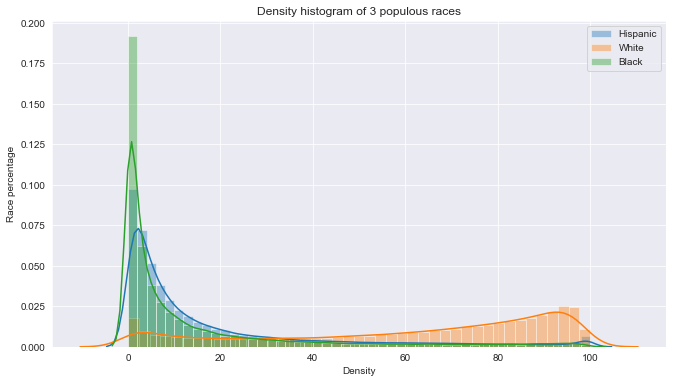

In [25]:
# Overlayed histograms of 3 most populous races
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
sns.distplot(df_17_model["Hispanic"], label="Hispanic", ax=ax)
sns.distplot(df_17_model["White"], label="White", ax=ax)
sns.distplot(df_17_model["Black"], label="Black", ax=ax)
plt.legend()
plt.title('Density histogram of 3 populous races')
plt.xlabel('Density');
plt.ylabel('Race percentage');

#### Interpretation

Th histogram shows the distribution of population density by race precentage (which is frequency). The vertical scale of a 'density histogram' shows units that make the total area of all the bars add to 100. This makes it possible to show the density curve of the population using the same vertical scale.

#### Lets plot the distribution of HighUnemployment and HighChildPoverty in pyplots. 

The plot indicates the frequency distribution of the HighUnemployment label is almost equally distributed among the population.
This is to simplify and balance the categorical variable for our models.

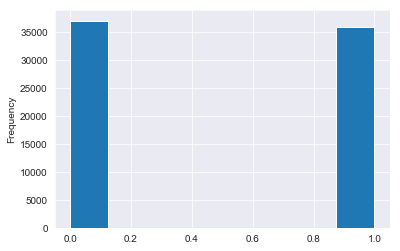

In [26]:
# Overlayed histograms HighUnemployment
df_17_cln.HighUnemployment.plot.hist(stacked=True, bins=8)

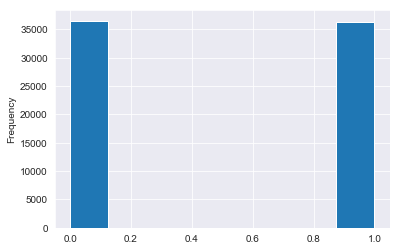

In [27]:

# Overlayed histograms HighUnemployment
df_17_cln.HighChildPoverty.plot.hist(stacked=True, bins=8)

#### Interpretation

These histograms show that the population is almost equally distributed for Unemployment and Child poverty and they are almost correlated.

# Modeling and Evaluation

<div class="alert alert-block alert-info">
<b>Rubric 4:</b> Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results.
</div>

### Evaluating the features importance using SGD method

In this part we do the training and update the model weights. The hyper parameter "learning rate" is set. It can neither be too small or too large so as to reach the minimum of the loss function.
We can use values between 0 and 1 (randomly) and minimize loss and maximize prediction. If the difference between the last values of cost is less than the threshold, then we stop updating.
The below code actually standardise the scale and bring about the top 10 features that are important for our clustering analysis.

In [28]:
# Standard scaler used to scale the variables.
# also scale variables
# Following code from Dr. Larson's Logits and SVM notebook
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

# we want to predict the X and y data as follows:
if 'HighUnemployment' in df_17_model:
    y_u = df_17_model['HighUnemployment'].values # get the labels we want
    del df_17_model['HighUnemployment'] # get rid of the class label
    X = df_17_model.values # use everything else to predict

# 10 fold cross-validation
num_cv_iterations = 10
num_instances = len(y_u)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2)
                         
print(cv_object)

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y_u)):
    # scale attributes by the training set
    scl_obj.fit(X[train_indices])
    X_train_scaled = scl_obj.transform(X[train_indices]) # apply to training
    X_test_scaled = scl_obj.transform(X[test_indices]) # use training scales to adjust test set, so we're not cheating

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


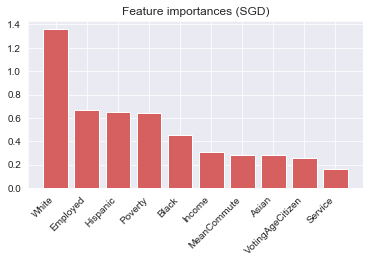

In [29]:
from sklearn.linear_model import SGDClassifier

#Features most important using Logistic regression
#The best hyperparameter offered a log loss of .675 and accuracy of 73% which is somewhat good.


SGD = SGDClassifier(loss="log", penalty = "l2", max_iter=500, tol=1e-3)
SGD.fit(X_train_scaled,y_u[train_indices])

coefs = np.abs(SGD.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (SGD)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), df_17_model.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); plt.show()

#### Top 10 features for clustering

We determined the features White, Hispanic, Professional, Black, Employed, Service, Poverty, Mean commute, VotingAgeCitizen, and Asian are important in influencing the High Unemployment and High ChildPoverty..

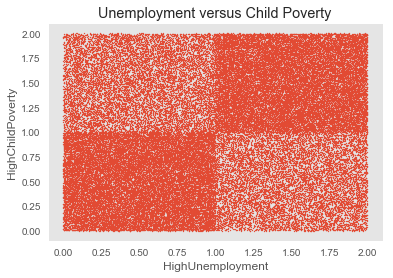

In [30]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

X1 = df_17_cln[['HighUnemployment','HighChildPoverty']].values

plt.scatter(X1[:, 0]+np.random.random(X1[:, 0].shape), X1[:, 1]+np.random.random(X1[:, 1].shape), 
             s=0.7)
plt.xlabel('HighUnemployment'), plt.ylabel('HighChildPoverty')
plt.grid()
plt.title('Unemployment versus Child Poverty')
plt.show()

Text(0.5, 1.0, 'Heat Map for 8 important features')

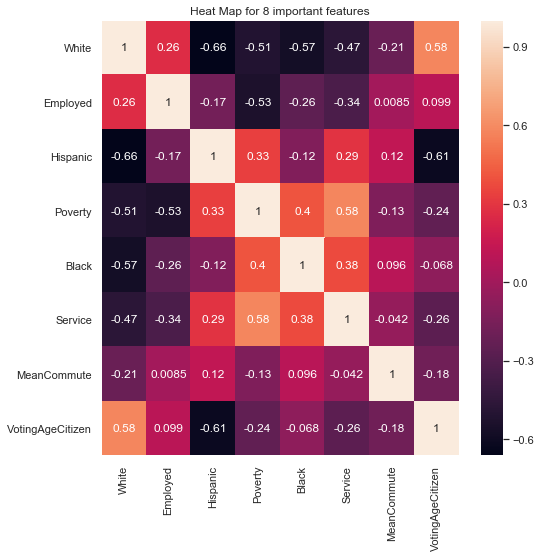

In [31]:
sns.set(rc={'figure.figsize':(8,8)})

corr = df_17_model[['White','Employed','Hispanic','Poverty','Black','Service','MeanCommute','VotingAgeCitizen']].corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heat Map for 8 important features')

In [32]:
# Standard scaler used to scale the variables.
# also scale variables
# Following code from Dr. Larson's Logits and SVM notebook
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

X = df_17_model[['White','Employed','Hispanic','Poverty','Black','Service','MeanCommute','VotingAgeCitizen']].values # use importatnt features
# we want to predict the X and y data as follows:
if 'HighUnemployment' in df_17_model:
    y_u = df_17_model['HighUnemployment'].values # get the labels we want
    del df_17_model['HighUnemployment'] # get rid of the class label
    
# 10 fold cross-validation
num_cv_iterations = 10
num_instances = len(y_u)
cv_obj = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2)
                         
print(cv_obj)

for iter_num, (train_ind, test_ind) in enumerate(cv_obj.split(X,y_u)):
    # scale attributes by the training set
    scl_obj.fit(X[train_ind])
    X_train_sc = scl_obj.transform(X[train_ind]) # apply to training
    X_test_sc = scl_obj.transform(X[test_ind]) # use training scales to adjust test set, so we're not cheating

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [33]:
#Kmeans clustering#
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=8)
# Fitting the input data
kmeans = kmeans.fit(X_train_sc)
# Getting the cluster labels
labels = kmeans.predict(X_test_sc)
# Centroid values
centroids = kmeans.cluster_centers_

In [34]:
# Comparing with scikit-learn centroids
print(centroids) # From sci-kit learn

[[ 0.43716737  0.5188432  -0.35388056 -0.77955321 -0.38179703 -0.78498433
   0.93482364  0.12822709]
 [ 0.04160069 -0.52892608 -0.19404649  0.9740984   0.06794551  0.79652726
  -0.95616455  0.17732671]
 [-1.59278497 -1.48583411 -0.41643435  1.96266245  2.8936812   1.63355518
  -0.05987678 -0.17587203]
 [ 0.79278127 -0.76610763 -0.5220349  -0.08457146 -0.37991298 -0.14136751
   0.05616009  0.63337827]
 [ 0.68230772  0.68456737 -0.46420416 -0.54061307 -0.38413166 -0.46853127
  -0.66182871  0.46882243]
 [-1.65102143 -0.7833514   2.52068031  1.27297233 -0.23115159  0.96143703
   0.28284915 -1.78986583]
 [-0.84397521  0.29963021  0.92278159 -0.14317854 -0.16056482  0.21272829
   0.35300204 -0.85358839]
 [-1.30624346 -0.04464426 -0.34209238  0.19733842  2.33503969  0.37569545
   0.69381688 -0.0074079 ]]


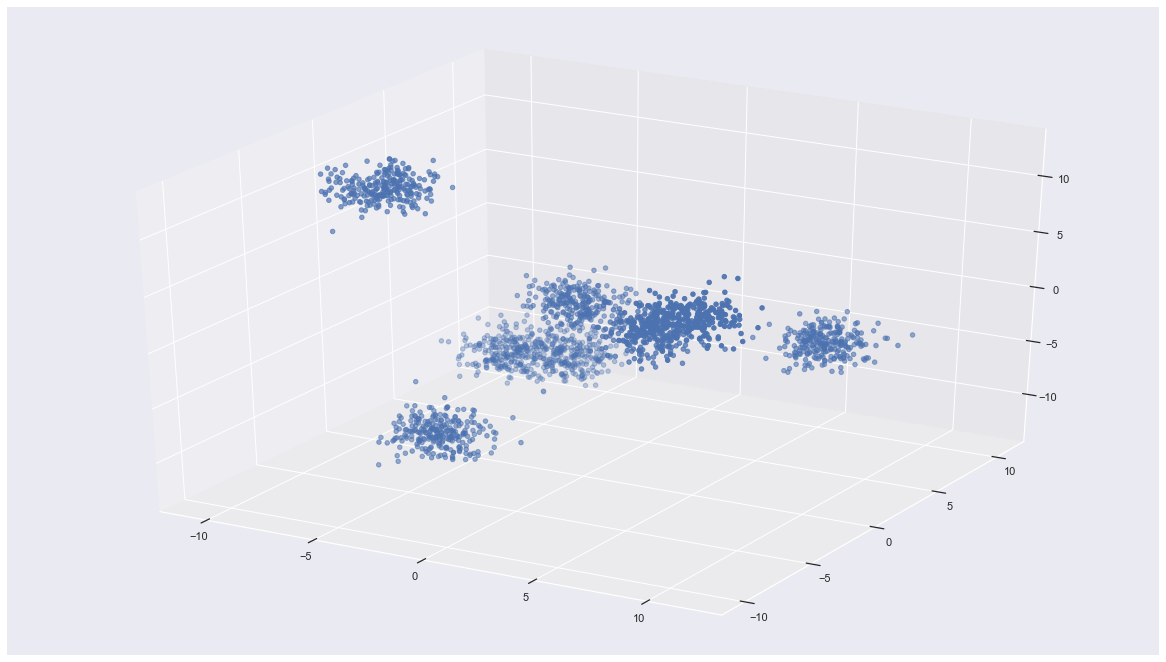

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X_test_sc, y_u = make_blobs(n_samples=2000, n_features=8, centers=8)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_test_sc[:, 0], X_test_sc[:, 1], X_test_sc[:, 2])

## Cluster Analysis

<div class="alert alert-block alert-info">
    
    
    
- Perform cluster analysis using several clustering methods.
- How did you determine a suitable number of clusters for each method?
- Use internal and/or external validation measures to describe and compare the clusterings and the clusters (some visual methods would be good).
- Describe your results. What findings are the most interesting and why?
</div>

## Desirable Properties of Clusters:

Some of the desirable properties of clusters are:

**Homogeneity:** Each cluster should contain members of the same class.
**Completeness:** All members of a class should lie in the same cluster.
Homogeneity and completeness are inversely related. Each lies between 0 and 1 (higher is better). They are similar to precision and recall.
**V-measure:** is the harmonic mean of homogeneity and completeness. Homogeneity, Completeness and V-measure are related set of metrics. They have bounded scores between 0 and 1. They are easy to interpret - higher is better. They are easy to apply to any algorithm, however they require labeled data.

**Adjusted Rand Index:** is a measure of similarity between labels and assigned clusters. This also needs labeled data and adjusts for probability of correct labeling by chance. It is named after William Rand. Takes value between -1 and 1 in sklearn. 1 indicates that labels and calculated clusters agree perfectly for all points, 0 or negative values are bad which indicate that labels and calculated clusters are independent.

**Adjusted Mutual Info:** measures mutual information in overlap between cluster assignments. This also needs labeled data. 1 indicates highest mutual information, i.e. best clustering. 0 or negative values are bad which indicate that labels and calculated clusters are independent.

**Silhouette Score:** defines Silhouette coefficient for each sample. This is a measure of how similar an object is to objects in its own cluster, and how different it is from objects in other clusters. Overall Silhouette score averages Silhouette coefficient of each sample. There is no need for labeled data.


In [68]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


import warnings
warnings.filterwarnings("ignore")

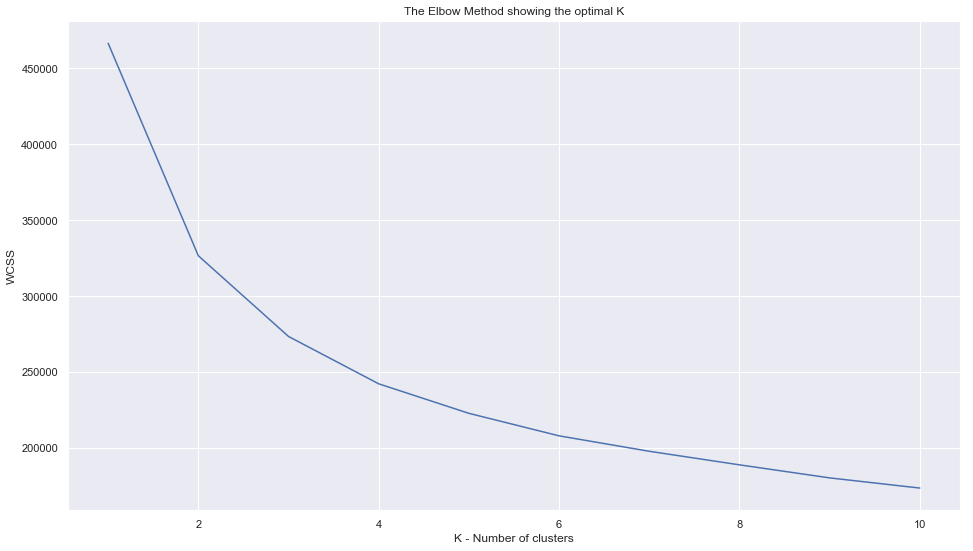

In [69]:
# Using the elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method showing the optimal K')
plt.xlabel('K - Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow method suggests an optimal number of clusters at 2 or 3. Now let's confirm the optimal K using hyperparameter tuning.

In [42]:
# Hyperparameter Tuning
parameters = {'n_clusters': [2, 3, 4, 5, 6, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 6},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [43]:
best_score = -1
model = KMeans()
for g in parameter_grid:
    model.set_params(**g)
    model.fit(X_train_sc)

    ss = metrics.silhouette_score(X_train_sc, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.3653920780256919
Parameter:  {'n_clusters': 3} Score:  0.381593445352626
Parameter:  {'n_clusters': 4} Score:  0.19754601034378072
Parameter:  {'n_clusters': 5} Score:  0.1824169975097855
Parameter:  {'n_clusters': 6} Score:  0.16438223375127275
Parameter:  {'n_clusters': 10} Score:  0.1494977382156846
Parameter:  {'n_clusters': 20} Score:  0.1307125773383233
Parameter:  {'n_clusters': 30} Score:  0.12271650526510954


In [44]:
best_grid

{'n_clusters': 3}

In [70]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [46]:
# K-means clustering
def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [47]:
build_model(k_means, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.520	1.000	0.685	0.428	0.520	0.388


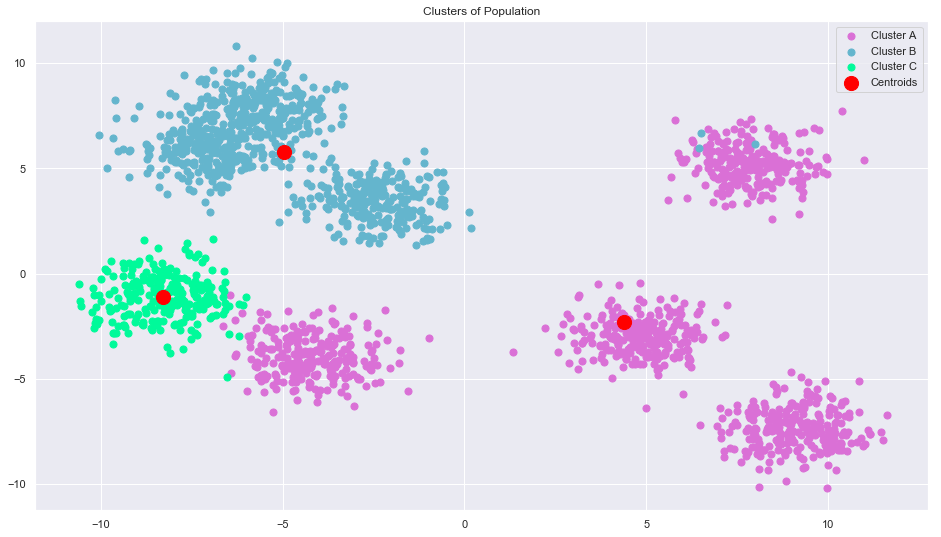

In [49]:
# Fitting K-Means to the test dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test_sc)

# Scatter chart of the clusters
plt.scatter(X_test_sc[y_kmeans == 0, 0], X_test_sc[y_kmeans == 0, 1], s = 50, c = 'orchid', label = 'Cluster A')
plt.scatter(X_test_sc[y_kmeans == 1, 0], X_test_sc[y_kmeans == 1, 1], s = 50, c = 'c', label = 'Cluster B')
plt.scatter(X_test_sc[y_kmeans == 2, 0], X_test_sc[y_kmeans == 2, 1], s = 50, c = 'mediumspringgreen', label = 'Cluster C')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of Population')
plt.legend()
plt.show()



In [50]:
# Agglomerative Clustering
def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(data)
    
    return model

In [51]:
build_model(agglomerative_fn, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.469	1.000	0.638	0.345	0.468	0.430


In [71]:
# DBSCAN Clustering
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model

In [74]:
build_model(dbscan_fn, X_test_sc, y_u)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-74-2148da1be581>", line 1, in <module>
    build_model(dbscan_fn, X_test_sc, y_u)
  File "<ipython-input-70-463089fcf9ce>", line 14, in build_model
    metrics.silhouette_score(data, model.labels_)))
  File "/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py", line 117, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))
  File "/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py", line 217, in silhouette_samples
    check_number_of_labels(len(le.classes_), n_samples)
  File "/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py", line 35, in check_number_of_labels
  

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [56]:
# MeanShift Clustering
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [57]:
build_model(mean_shift_fn, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
1.000	0.274	0.430	0.000	0.001	0.004


In [58]:
# Birch Clustering
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

In [59]:
build_model(birch_fn, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.469	1.000	0.638	0.345	0.468	0.430


In [60]:
# Affinity Propagation Clustering
def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

In [61]:
build_model(affinity_propagation_fn, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
1.000	1.000	1.000	1.000	1.000	0.785


In [62]:
# Mini Batch KMeans Clustering
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

In [63]:
build_model(mini_batch_kmeans_fn, X_test_sc, y_u)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.520	1.000	0.685	0.428	0.520	0.388


# Deployment

<div class="alert alert-block alert-info">
<b>Rubric 5:</b> Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
- How would your deploy your model for interested parties?
- What other data should be collected? 
- How often would the model need to be updated, etc.?
</div>

TODO update for lab 3 models

We believe our models could be fairly useful for interested parties, who would likely be philanthropic organizations seeking to bring economic development or aid to areas in need. Our models, specifically the Random Forest models for predicting unemployment and child poverty, achieved decent accuracy levels. We would count it a success if the use of our models led those organizations to aid significantly more neighborhoods than they were before using our models, because they were able to more successfully identify areas in need through our models.

The process of deploying our model would be somewhat dependent on the organization we were deploying it for. This is because they may want to use our models to predict unemployment or child poverty on their own data, but they may not have as many predictor variables as we used to train our models. Thus we would trim down our training sets and models based on the data we knew would be coming in. Beyond this, however, deploying our models might involve setting up a server and then setting up endpoints so that the company could make API requests to predict data points individually or in batches.

Another option might be to use an existing service such as Deep Cognition (reference below) to host our models. This would require additional research and possibly more expenses, but would likely require less technical knowledge of setting up a server, endpoints, etc. which might be a limiting factor.

The source of our data from was only a subset of the available attributes recorded by the U.S. government. We could retrieve additional features to make the deployed models even more generalized to the data that interested parties might have. In addition, the models should be updated every few years (say, every 5-10 years) to remain current. This works well with the U.S. census data that we trained our models on, since they are taken every 10 years but yearly estimates are published as well.

# Exceptional Work

<div class="alert alert-block alert-info">
<b>Rubric 6:</b> You have free reign to provide additional analyses or combine analyses.
</div>

#### References

1. https://towardsdatascience.com/deploying-deep-learning-models-e9e4d7dda3ff
2. https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure